In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Definimos una función para calcular el coeficiente binomial
def binom(k, j):

    return math.factorial(k) // (math.factorial(j) * math.factorial(k - j))

In [3]:
# Definimos ambas sumatorias
def calculo(L, a, Py):
    P_plus_t1 = 0
    
    for k in range(1, L + 1):
        sumatoria1 = 0
        for j in range(int((k//2)+1), k + 1):
            coef = binom(k,j)
            sumatoria1 += coef * (Py ** j) * ((1 - Py) ** (k - j))
        
        P_plus_t1 += a[k - 1] * sumatoria1
    return P_plus_t1 

In [4]:
#Condiciones iniciales
Py1 = np.linspace(0,1,100) #Valor inicial de Poblacion a favor
Py2 = np.linspace(0,1,100)

a1 = [0.2, 0.2, 0.2, 0.2, 0.1, 0.1] # todos los valores de cada a_i
a2 = [0,0.1,0.9]
L1 = len(a1)   #Numero de grupos a_i
L2 = len(a2)

In [5]:
# Iterar para varios valores de t
iteraciones = 1
val_tm1_1 = [Py1]
val_tm1_2 = [Py2]
for i in range(iteraciones):
    tm1_1 = calculo(L1, a1, Py1)
    tm1_2 = calculo(L2,a2,Py2)
    val_tm1_1.append(tm1_1)
    val_tm1_2.append(tm1_2)
    Py1 = tm1_1
    Py2 = tm1_2

In [6]:
pt_1_l = val_tm1_1[:-1] #Tomamos todos excepto el último
ptm1_1_l = val_tm1_1[1:] # tomamos todos los valores excepto el primero

pt_2_l = val_tm1_2[:-1]
ptm1_2_l =val_tm1_2[1:]

#convertir a listas:
pt_1 = np.array(pt_1_l)
ptm1_1 = np.array(ptm1_1_l)
pt_2 = np.array(pt_2_l)
ptm1_2 = np.array(ptm1_2_l)

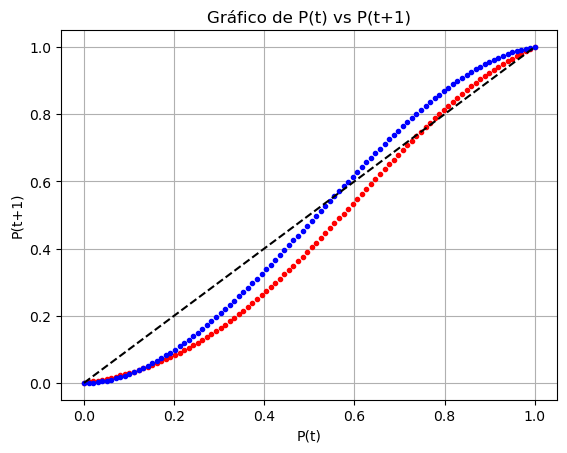

In [7]:
# Crear el gráfico
plt.figure()

plt.plot(pt_1, ptm1_1, marker='.', linestyle='-', color='red', linewidth=1) #Grafico a_1,2,3,4=0.2, a5,6=0.1
plt.plot(pt_2, ptm1_2, marker='.', linestyle='-', color='b',linewidth=1) # Grafico valores a1=0,a2=0.1,a3=0.9


plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('P(t)')
plt.ylabel('P(t+1)')
plt.title('Gráfico de P(t) vs P(t+1)')
plt.grid()
plt.show()